<a href="https://colab.research.google.com/github/rnaushik/Scratch-implementation-of-machine-learning-basic/blob/master/ML_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Finding Donors by predicting person's income



In [199]:
import pandas as pd
import numpy as np

df=pd.read_csv("adult.csv")
df.head(n=10)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


Finding how the data is

In [200]:
n_greater_50k = df.loc[df['income'] == '>50K'].shape[0]
n_at_most_50k = df.loc[df['income'] == '<=50K'].shape[0]

print("Total number of records: " ,n_records)
print(df.shape)
print("Individuals making more than $50,000:",n_greater_50k)
print("Individuals making at most $50,000",n_at_most_50k)


Total number of records:  30162
(32561, 15)
Individuals making more than $50,000: 7841
Individuals making at most $50,000 24720


Finding missing values

In [201]:
for col in df.columns:
  print(col)
  print(len(df[df[col] == '?']))

age
0
workclass
1836
fnlwgt
0
education
0
education.num
0
marital.status
0
occupation
1843
relationship
0
race
0
sex
0
capital.gain
0
capital.loss
0
hours.per.week
0
native.country
583
income
0


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Removing missing values

In [202]:
for col in df.columns:
  df=df[df[col]!='?']

#print(df.shape)

for col in df.columns:
  print(col)
  print(len(df[df[col] == '?']))

age
0
workclass
0
fnlwgt
0
education
0
education.num
0
marital.status
0
occupation
0
relationship
0
race
0
sex
0
capital.gain
0
capital.loss
0
hours.per.week
0
native.country
0
income
0


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [203]:
n_records=df.shape[0]
n_greater_50k = df.loc[df['income'] == '>50K'].shape[0]
n_at_most_50k = df.loc[df['income'] == '<=50K'].shape[0]

print("Total number of records: " ,n_records)
print(df.shape)
print("Individuals making more than $50,000:",n_greater_50k)
print("Individuals making at most $50,000",n_at_most_50k)

Total number of records:  30162
(30162, 15)
Individuals making more than $50,000: 7508
Individuals making at most $50,000 22654


Coverting data type of target label income (string into numerical)

In [190]:
n_records=df.shape[0]

def numeric_value(value):

  if value == ">50K":
    return 1
  if value == "<=50K":
    return 0

df['Income'] = df['income'].apply(numeric_value)
df = df.drop('income', 1)

print("Total number of records: " ,n_records)
print(df.shape)
df.head(n=10)


Total number of records:  30162
(30162, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,1
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,1
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,1


Normailisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52db724470>,
      dtype=object)

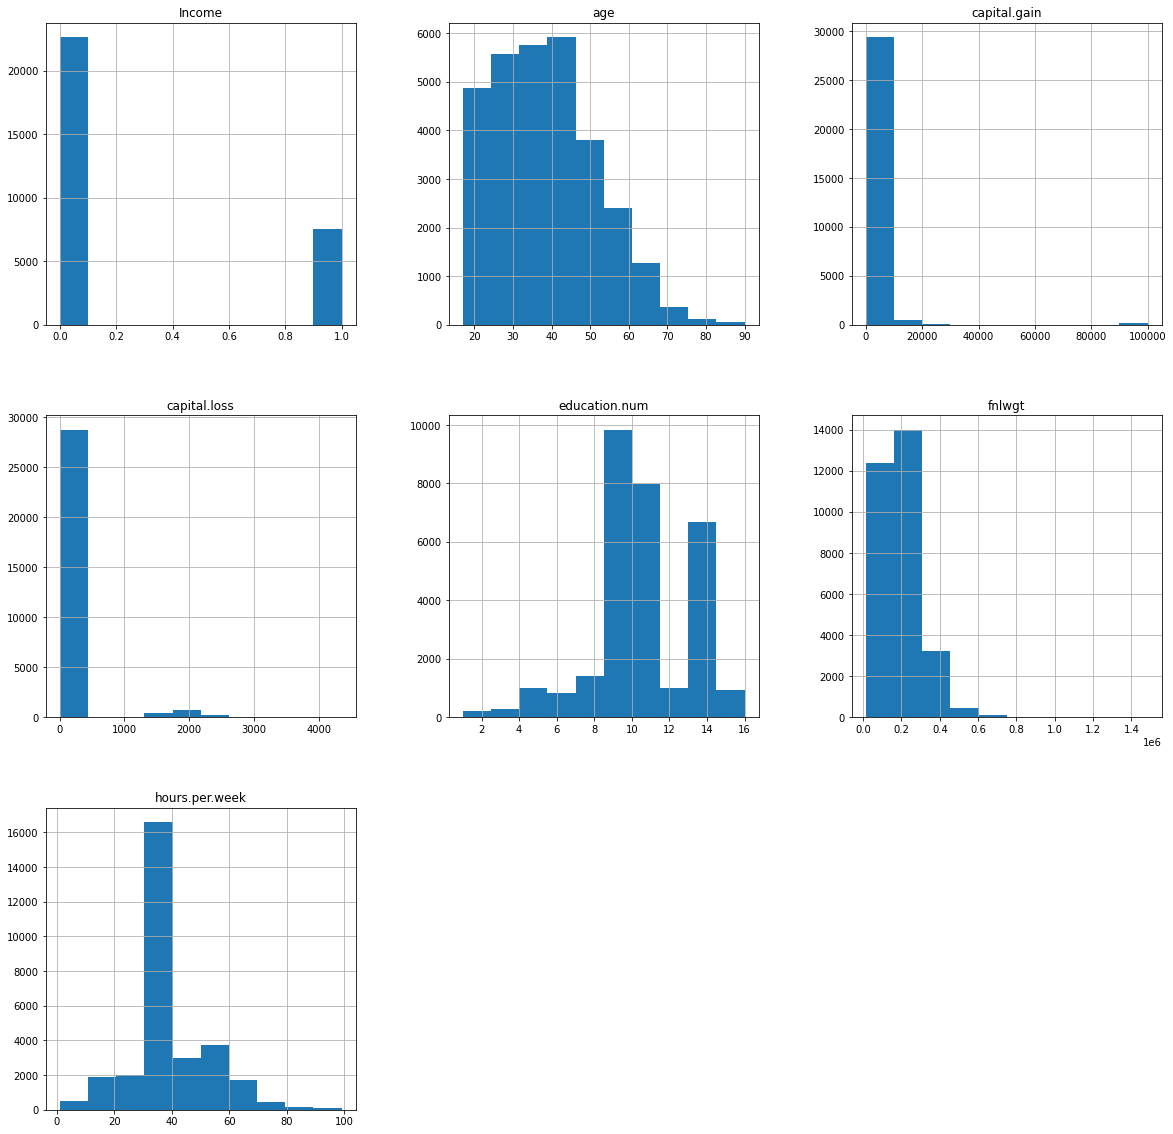

In [191]:
df.hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52db12def0>,
      dtype=object)

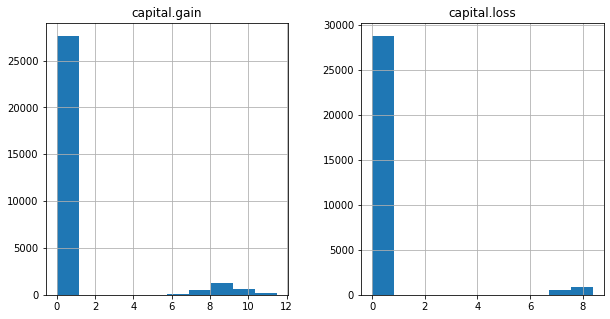

In [192]:
skewed = ['capital.gain', 'capital.loss']
df[skewed] = df[skewed].apply(lambda x: np.log(x + 1))
df.hist(skewed,figsize=(10,5))

Finding correlation

In [193]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,Income
age,1.000000,-0.076511,0.043526,0.122100,0.055200,0.101599,0.241998
fnlwgt,-0.076511,1.000000,-0.044992,-0.005213,-0.009373,-0.022886,-0.008957
education.num,0.043526,-0.044992,1.000000,0.130376,0.076890,0.152522,0.335286
capital.gain,0.122100,-0.005213,0.130376,1.000000,-0.067040,0.086243,0.288459
capital.loss,0.055200,-0.009373,0.076890,-0.067040,1.000000,0.049468,0.140338
hours.per.week,0.101599,-0.022886,0.152522,0.086243,0.049468,1.000000,0.229480
Income,0.241998,-0.008957,0.335286,0.288459,0.140338,0.229480,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52db0ce2b0>,
      dtype=object)

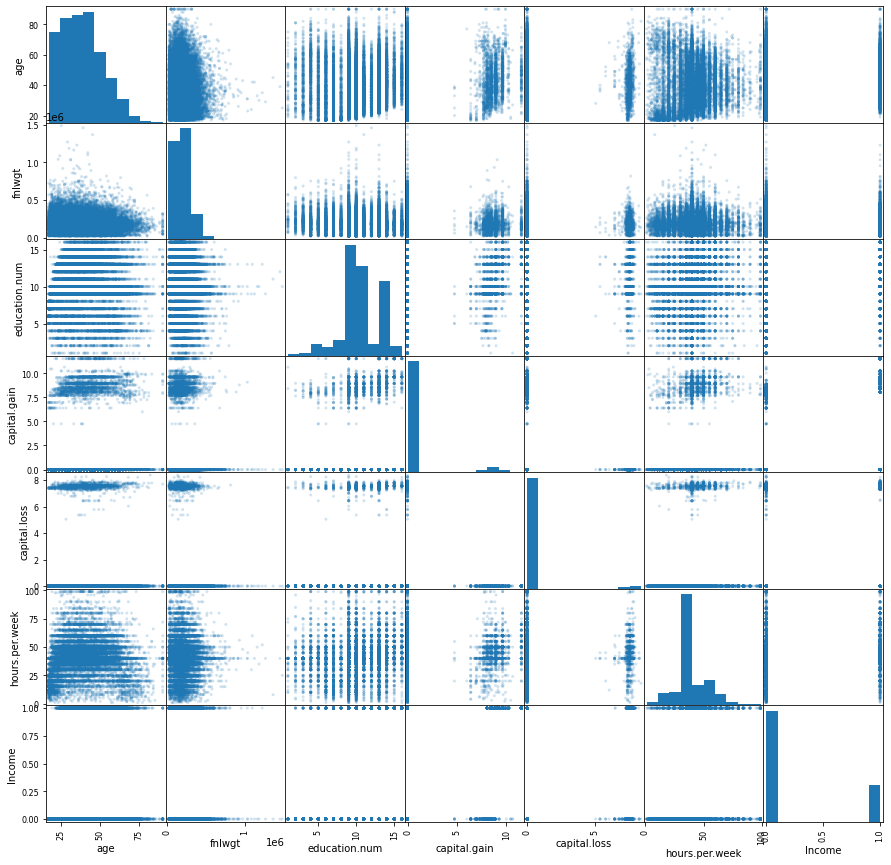

In [194]:
pd.plotting.scatter_matrix(df,figsize=(15,15),alpha=0.2)

In [195]:
#income_raw = df['Income']
features_raw = df.drop('Income', axis = 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
features_raw[numerical] = scaler.fit_transform(features_raw[numerical])


print("Before")
display(df.head())
print("After")
features_raw.head()

Before


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,8.379539,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,8.268988,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0.0,8.268988,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0.0,8.235095,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0.0,8.235095,40,United-States,0


After


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,0.890411,Private,132870,HS-grad,0.533333,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,1.000000,0.173469,United-States
3,0.506849,Private,140359,7th-8th,0.200000,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,0.986807,0.397959,United-States
4,0.328767,Private,264663,Some-college,0.600000,Separated,Prof-specialty,Own-child,White,Female,0.0,0.986807,0.397959,United-States
5,0.232877,Private,216864,HS-grad,0.533333,Divorced,Other-service,Unmarried,White,Female,0.0,0.982762,0.448980,United-States
6,0.287671,Private,150601,10th,0.333333,Separated,Adm-clerical,Unmarried,White,Male,0.0,0.982762,0.397959,United-States


In [196]:
features = pd.get_dummies(features_raw)

label = df['Income']

encoded = list(features.columns)
print(len(encoded))

104


Splitting data into train and test after preprocessing

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 0)
print ("Training set has",X_train.shape[0],'samples')
print("Testing set has",X_test.shape[0],'samples')

Training set has 24129 samples
Testing set has 6033 samples


Defining and Calculating metrics for different models

In [0]:
from sklearn.metrics import fbeta_score, accuracy_score,confusion_matrix,classification_report,precision_score 

def train_predict(learner,X_train,y_train,X_test,y_test): 
  
    results = {}    
    learner = learner.fit(X_train,y_train)    
    predictions_test = learner.predict(X_test)
    #predictions_train = learner.predict(X_train)

    #results['acc_train'] = accuracy_score(y_train,predictions_train)
        
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    #results['f_train'] = fbeta_score(y_train,predictions_train,beta=0.5)
        
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1,zero_division=1)

    results['precision']=precision_score(y_test,predictions_test,zero_division=1)

    print( learner.__class__.__name__)

    c_m = confusion_matrix(y_test,predictions_test)       
    print ('Confusion Matrix :')
    print(c_m)
    #print('\nclassification report')
    #print(classification_report(y_test,predictions_test,zero_division=1))

    
    return results

In [205]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier


model_1 = DecisionTreeClassifier(random_state=0)
model_2 = KNeighborsClassifier()
model_3 = SVC(random_state=0)
model_4 = LogisticRegression(random_state=0)
#model_5 = GaussianNB()
#model_6 = SGDClassifier(random_state=0)
model_7=  AdaBoostClassifier()

model_list = [model_1,model_2,model_3,model_4,model_7]
#model_list = [model_3,model_4]

result={}
for i,model in enumerate(model_list):
  result[i]=train_predict(model,X_train,y_train,X_test,y_test)
  print('\n',result[i])
  print('-------------')

DecisionTreeClassifier
Confusion Matrix :
[[3991  538]
 [ 584  920]]

 {'acc_test': 0.8140228741919443, 'f_test': 0.6212018906144497, 'precision': 0.6310013717421125}
-------------
KNeighborsClassifier
Confusion Matrix :
[[3984  545]
 [1213  291]]

 {'acc_test': 0.7086026852312283, 'f_test': 0.2487179487179487, 'precision': 0.3480861244019139}
-------------
SVC
Confusion Matrix :
[[4529    0]
 [1504    0]]

 {'acc_test': 0.750704458809879, 'f_test': 0.0, 'precision': 1.0}
-------------
LogisticRegression
Confusion Matrix :
[[4529    0]
 [1504    0]]

 {'acc_test': 0.750704458809879, 'f_test': 0.0, 'precision': 1.0}
-------------
AdaBoostClassifier
Confusion Matrix :
[[4253  276]
 [ 572  932]]

 {'acc_test': 0.8594397480523785, 'f_test': 0.6873156342182891, 'precision': 0.7715231788079471}
-------------


Finding best model

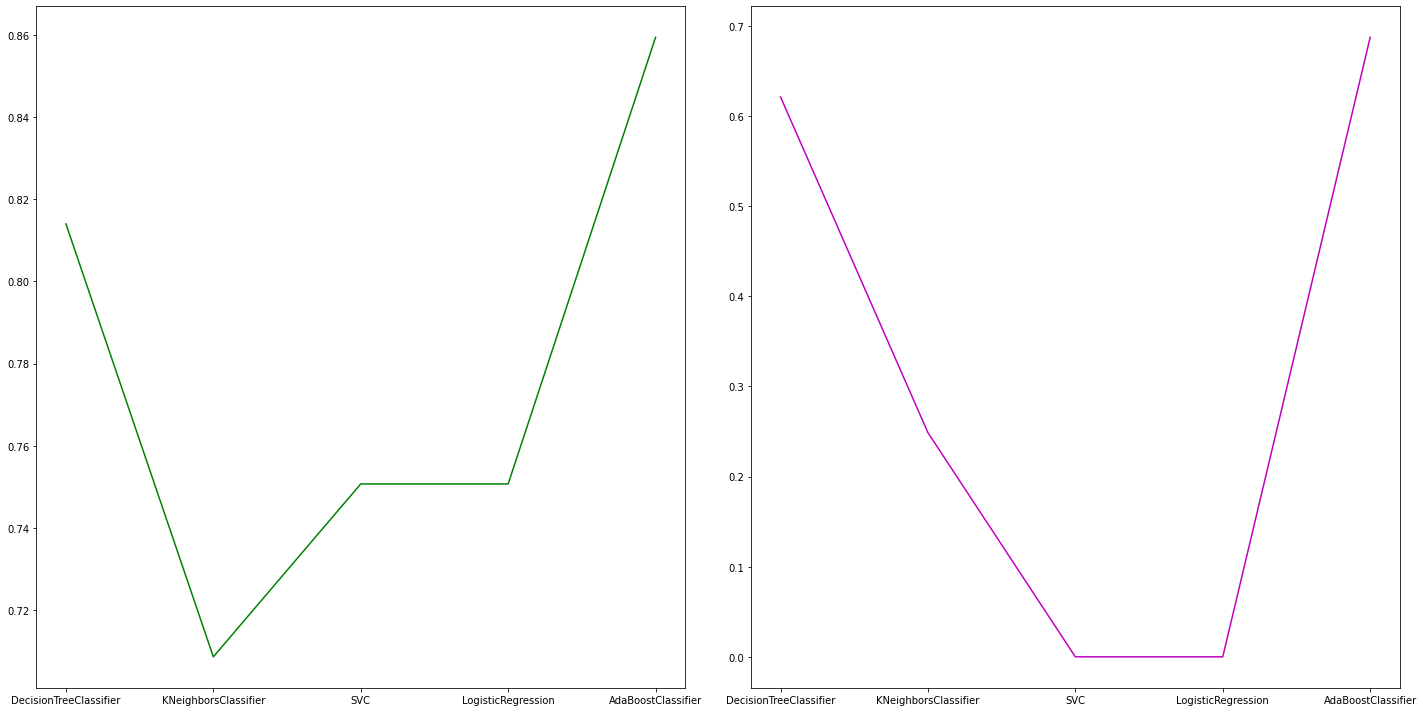

In [206]:
import matplotlib.pyplot as plt
cc=len(model_list)
accuracy=np.ones(cc)
f1score=np.ones(cc)
i=0
x=['a','a','a','a','a']
for i,model in enumerate(model_list):
  x[i]=model.__class__.__name__
for i in range(cc):
  accuracy[i]=result[i]['acc_test']
  f1score[i]=result[i]['f_test']
bins=10

fig, axes = plt.subplots(1,2,figsize=(20,10)) 
  
# plotting graph for 1st column 
axes[0].plot(x,accuracy, 'g') 
  
# plotting graph for second column 
axes[1].plot(x, f1score, 'm') 
  
# Gives a clean look to the graphs 
fig.tight_layout()

Significant features

In [207]:
from sklearn.feature_selection import SelectKBest, chi2
print(features_raw.columns)
less_features=features_raw.drop(['education.num','native.country','race','fnlwgt'],axis=1)
print(less_features.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')
Index(['age', 'workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


In [208]:
features1 = pd.get_dummies(less_features)
encoded1 = list(features1.columns)
print(len(encoded1))



56


In [209]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, label, test_size = 0.2, random_state = 0)
print ("Training set has",X_train.shape[0],'samples')
print("Testing set has",X_test.shape[0],'samples')



Training set has 24129 samples
Testing set has 6033 samples


In [210]:
result1={}
for i,model in enumerate(model_list):
  result1[i]=train_predict(model,X_train1,y_train1,X_test1,y_test1)
  print('\n',result1[i])
  print('-------------')

DecisionTreeClassifier
Confusion Matrix :
[[4022  507]
 [ 590  914]]

 {'acc_test': 0.8181667495441737, 'f_test': 0.624957264957265, 'precision': 0.6432090077410274}
-------------
KNeighborsClassifier
Confusion Matrix :
[[4094  435]
 [ 618  886]]

 {'acc_test': 0.8254599701640974, 'f_test': 0.6272566371681415, 'precision': 0.6707040121120363}
-------------
SVC
Confusion Matrix :
[[4191  338]
 [ 666  838]]

 {'acc_test': 0.8335819658544671, 'f_test': 0.6253731343283582, 'precision': 0.7125850340136054}
-------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression
Confusion Matrix :
[[4186  343]
 [ 647  857]]

 {'acc_test': 0.8359025360517156, 'f_test': 0.6338757396449703, 'precision': 0.7141666666666666}
-------------
AdaBoostClassifier
Confusion Matrix :
[[4241  288]
 [ 573  931]]

 {'acc_test': 0.8572849328692193, 'f_test': 0.6838046272493573, 'precision': 0.7637407711238721}
-------------


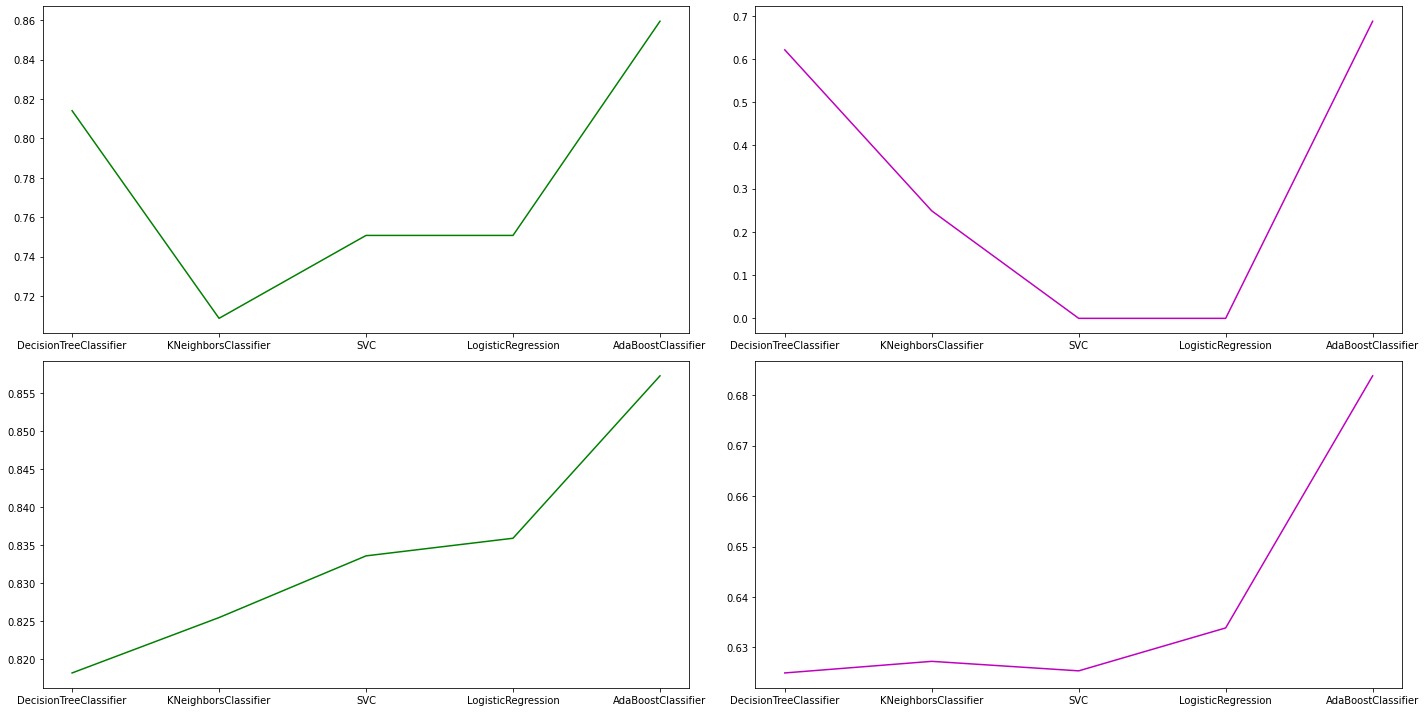

In [211]:
import matplotlib.pyplot as plt
cc=len(model_list)
accuracy=np.ones(cc)
accuracy1=np.ones(cc)
f1score=np.ones(cc)
f1score1=np.ones(cc)
i=0
x=['a','a','a','a','a']
for i,model in enumerate(model_list):
  x[i]=model.__class__.__name__
for i in range(cc):
  accuracy[i]=result[i]['acc_test']
  f1score[i]=result[i]['f_test']
  accuracy1[i]=result1[i]['acc_test']
  f1score1[i]=result1[i]['f_test']
bins=10

fig, axes = plt.subplots(2,2,figsize=(20,10)) 
  
# plotting graph for 1st column 
axes[0,0].plot(x,accuracy, 'g') 
  
# plotting graph for second column 
axes[0,1].plot(x, f1score, 'm') 

axes[1,0].plot(x,accuracy1,'g')

axes[1,1].plot(x, f1score1, 'm') 

  
# Gives a clean look to the graphs 
fig.tight_layout()